In [13]:
import numpy as np
import keras as k
import tensorflow as tf
from tensorflow.keras import backend as k
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
train_path = 'G:/AI_INTRO/DEEPLIZARD/dogs-vs-cats/train'
valid_path = 'G:/AI_INTRO/DEEPLIZARD/dogs-vs-cats/valid'
test_path = 'G:/AI_INTRO/DEEPLIZARD/dogs-vs-cats/test'

In [15]:
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    train_path, target_size=(224,224), classes=['dog','cat'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    valid_path, target_size=(224,224), classes=['dog','cat'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    test_path, target_size=(224,224), classes=['dog','cat'], batch_size=10, shuffle = False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [16]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [17]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [22]:
x = mobile.layers[-6].output
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs = mobile.input, outputs = predictions)

# the last five layers are erased.
# Only the previous layers are kept. 

In [23]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [24]:
for layer in model.layers[:-5]:
    layer.trainable = False

## Train the model

In [25]:
model.compile(Adam(learning_rate=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
model.fit_generator(train_batches, steps_per_epoch=40,
                   validation_data=valid_batches, validation_steps=10, epochs=50, verbose=2)

C:\Users\h\anaconda3\envs\tf-new\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
40/40 - 6s - loss: 0.2214 - accuracy: 0.9075 - val_loss: 0.7645 - val_accuracy: 0.7100
Epoch 2/50
40/40 - 2s - loss: 0.1424 - accuracy: 0.9475 - val_loss: 0.4383 - val_accuracy: 0.8300
Epoch 3/50
40/40 - 2s - loss: 0.1095 - accuracy: 0.9600 - val_loss: 0.5609 - val_accuracy: 0.8300
Epoch 4/50
40/40 - 1s - loss: 0.0567 - accuracy: 0.9825 - val_loss: 0.1900 - val_accuracy: 0.9300
Epoch 5/50
40/40 - 1s - loss: 0.0819 - accuracy: 0.9675 - val_loss: 0.0659 - val_accuracy: 0.9600
Epoch 6/50
40/40 - 1s - loss: 0.0470 - accuracy: 0.9850 - val_loss: 0.1566 - val_accuracy: 0.9500
Epoch 7/50
40/40 - 1s - loss: 0.0269 - accuracy: 0.9925 - val_loss: 0.1705 - val_accuracy: 0.9200
Epoch 8/50
40/40 - 1s - loss: 0.0435 - accuracy: 0.9900 - val_loss: 0.2076 - val_accuracy: 0.9200
Epoch 9/50
40/40 - 1s - loss: 0.0521 - accuracy: 0.9800 - val_loss: 0.1247 - val_accuracy: 0.9500
Epoch 10/50
40/40 - 1s - loss: 0.0222 - accuracy: 0.9925 - val_loss: 0.1510 - val_accuracy: 0.9400
Epoch 11/50
40/40 -

## Prediction

In [27]:
test_labels = test_batches.classes

In [28]:
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [29]:
test_batches.class_indices

{'dog': 0, 'cat': 1}

In [33]:
predictions = model.predict_generator(test_batches, steps = 10, verbose = 0)

In [34]:
np.round(predictions[:,0])

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [35]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [36]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

Confusion matrix, without normalization
[[50  0]
 [ 1 49]]


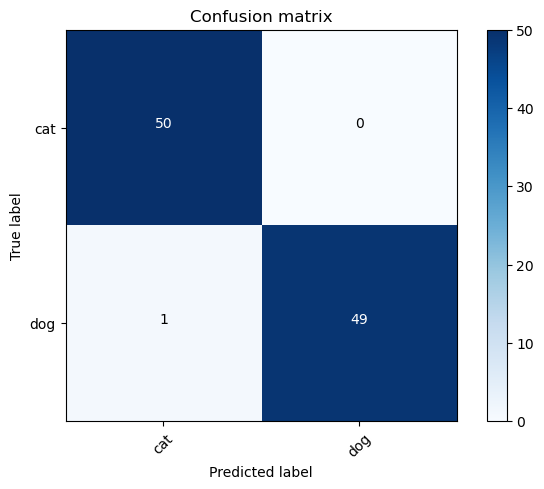

In [37]:
cm_plot_labels=['cat','dog']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion matrix')